In [1]:
import shap
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

In [2]:
# Load preprocessed data
X_train = joblib.load('../data/X_train.pkl')
X_test = joblib.load('../data/X_test.pkl')
y_train = joblib.load('../data/y_train.pkl')
y_test = joblib.load('../data/y_test.pkl')

In [3]:
xgb = joblib.load('../models/xgb_model.pkl')

In [4]:
# Create a SHAP explainer for tree-based models
explainer = shap.Explainer(xgb)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

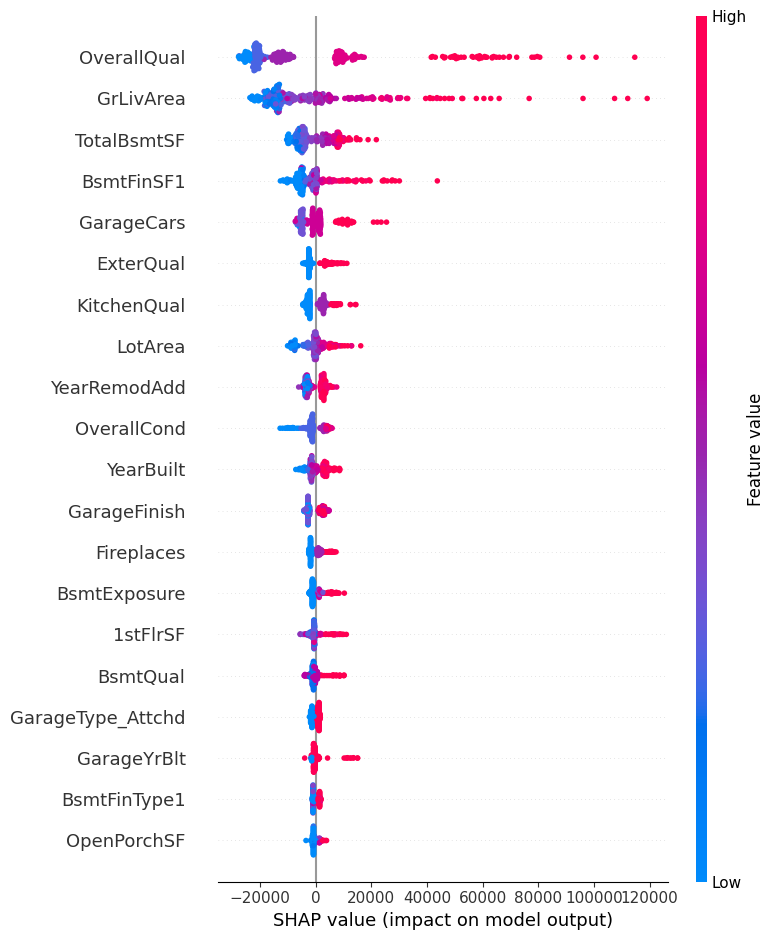

In [5]:
# Summary plot (global view)
shap.summary_plot(shap_values, X_test)

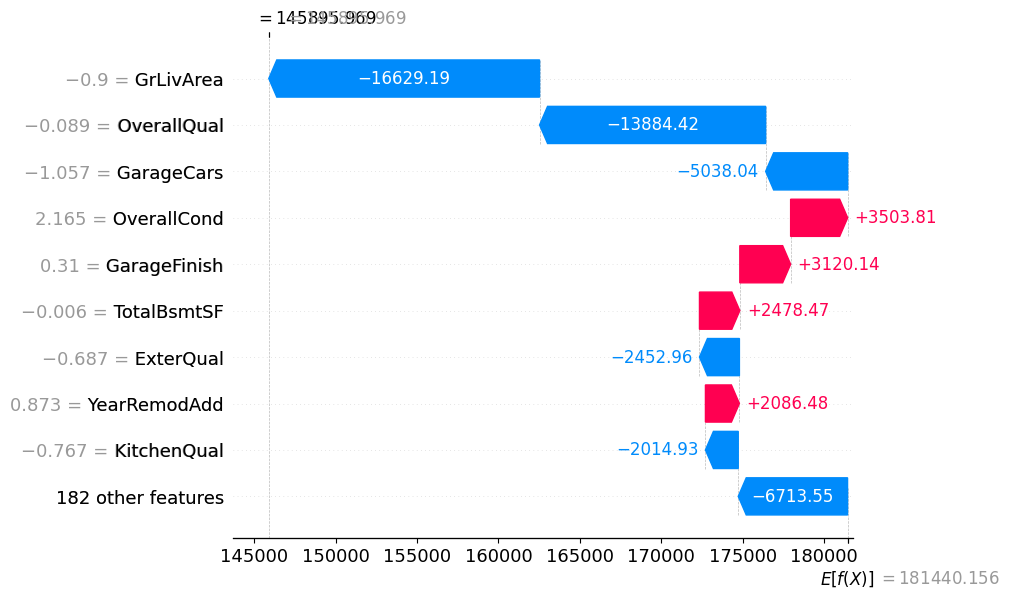

In [6]:
# Force plot for a single prediction
# Pick any row, e.g. row 0
shap.plots.waterfall(shap_values[0])

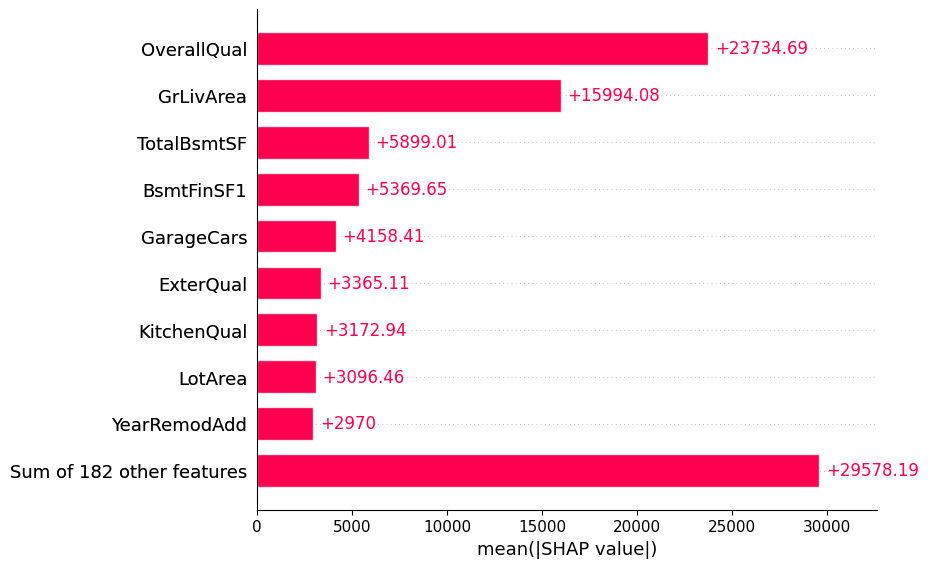

In [7]:
shap.plots.bar(shap_values)

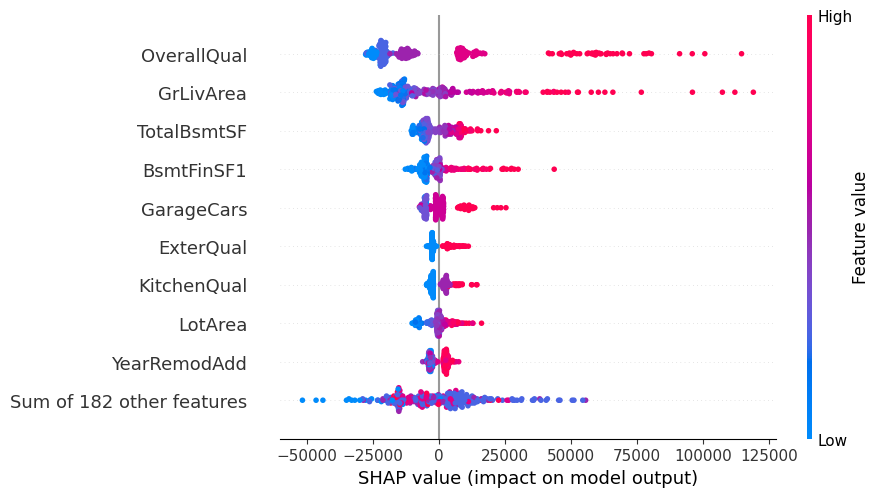

In [8]:
shap.plots.beeswarm(shap_values)

In [10]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

# Optional: Also display full width of each column
pd.set_option('display.width', None)

# Optional: Prevent truncation of column content
pd.set_option('display.max_colwidth', None)

In [11]:
X_train

Id  MSSubClass  LotFrontage   LotArea    Street  LotShape  \
254  -1.119284   -0.866764    -0.002938 -0.212896  0.058621  0.713803   
1066  0.790464    0.074110    -0.538359 -0.265245  0.058621 -0.980753   
638  -0.216152   -0.631546    -0.148962 -0.177841  0.058621  0.713803   
799   0.162505   -0.161109    -0.489684 -0.324474  0.058621  0.713803   
380  -0.822944   -0.161109    -0.976431 -0.529035  0.058621  0.713803   
...        ...         ...          ...       ...       ...       ...   
1095  0.858669   -0.866764     0.386459 -0.127631  0.058621 -0.980753   
1130  0.940986   -0.161109    -0.246311 -0.268313  0.058621  0.713803   
1294  1.326699   -0.866764    -0.489684 -0.234096  0.058621  0.713803   
860   0.305971   -0.161109    -0.733058 -0.283376  0.058621  0.713803   
1126  0.931579    1.485421    -0.830407 -0.651399  0.058621  0.713803   

      Utilities  LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
254    0.029273   0.221711    -0.820445     0.372217  -0.455469     -1.346063   
1066   0.029273   0.221711    -0.088934     1.268609   0.718609      0.439214   
638    0.029273   0.221711    -0.820445     1.268609  -1.988293     -1.683818   
799    0.029273   0.221711    -0.820445     1.268609  -1.107734     -1.683818   
380    0.029273   0.221711    -0.820445     0.372217  -1.531707     -1.683818   
...         ...        ...          ...          ...        ...           ...   
1095   0.029273   0.221711    -0.088934    -0.524174   1.142582      1.018222   
1130   0.029273   0.221711    -1.551955    -2.316957  -1.401254     -1.683818   
1294   0.029273   0.221711    -0.820445     1.268609  -0.520696      0.246211   
860    0.029273   0.221711     0.642577     2.165000  -1.727387      0.632217   
1126   0.029273   0.221711     0.642577    -0.524174   1.175195      1.066473   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
254    -0.597889  -0.687421   2.520919 -0.566201  0.110144     -0.587727   
1066   -0.597889   1.054244  -0.241214  0.585929  0.110144     -0.587727   
638    -0.597889  -0.687421  -0.241214 -1.718330  0.110144     -0.587727   
799     0.861522  -0.687421  -0.241214  0.585929  0.110144     -0.587727   
380    -0.597889  -0.687421  -0.241214 -0.566201  0.110144     -0.587727   
...          ...        ...        ...       ...       ...           ...   
1095   -0.597889   1.054244  -0.241214  0.585929  0.110144     -0.587727   
1130   -0.597889  -0.687421  -0.241214 -0.566201  0.110144     -0.587727   
1294   -0.597889  -0.687421  -0.241214 -0.566201  0.110144     -0.587727   
860    -0.597889   1.054244  -0.241214 -0.566201  0.110144     -0.587727   
1126    0.154982   1.054244  -0.241214  0.585929  0.110144     -0.587727   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
254      -0.255787    1.122626      -0.27716   -0.285504  -0.400282   
1066     -1.208766   -1.021498      -0.27716   -0.285504   0.511920   
638      -1.208766   -1.021498      -0.27716   -0.285504   0.505196   
799       0.697192    0.301720      -0.27716   -0.285504  -0.915776   
380      -0.732276   -0.514536      -0.27716   -0.285504   0.532091   
...            ...         ...           ...         ...        ...   
1095      1.173682   -0.965686      -0.27716   -0.285504   1.612389   
1130      0.220703    0.424972      -0.27716   -0.285504  -0.158223   
1294     -0.255787   -0.633137      -0.27716   -0.285504   0.283309   
860      -1.208766   -1.021498      -0.27716   -0.285504   0.765184   
1126     -1.208766   -1.021498      -0.27716   -0.285504   1.798415   

      TotalBsmtSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  \
254      0.572612  -1.168292    0.276582  0.374235 -0.801923     -0.118999   
1066    -0.596547  -0.132176    0.276582 -0.958202  0.955088     -0.118999   
638     -0.603357  -0.132176    0.276582 -0.965964 -0.801923     -0.118999   
799     -0.750921   0.903941    0.276582 -0.487321  0.989227     -0.118999   
380   